# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [48]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [49]:
from utils import get_train_input, get_dataset

In [50]:
train_dataset = get_train_input("experiments/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '/home/works

INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', '/home/workspace/data/train/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', '

INFO:tensorflow:Number of filenames to read: 86


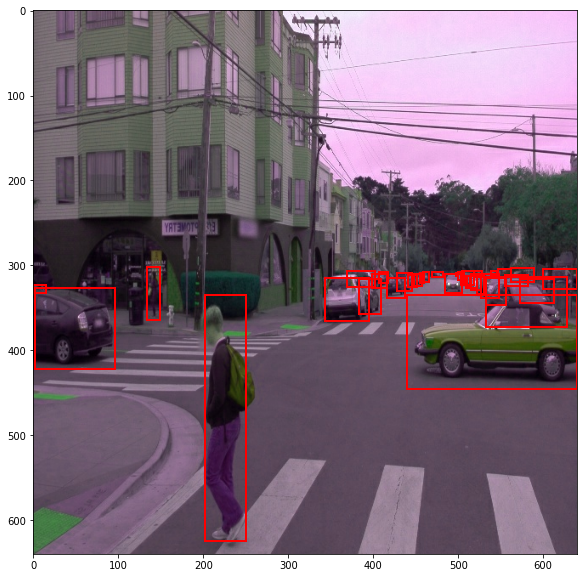

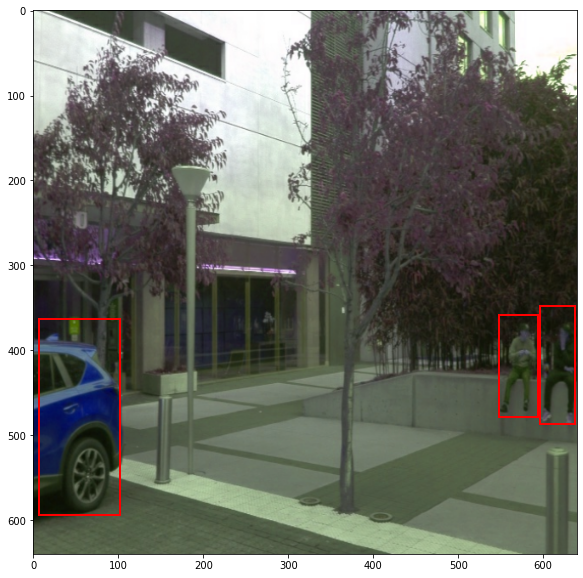

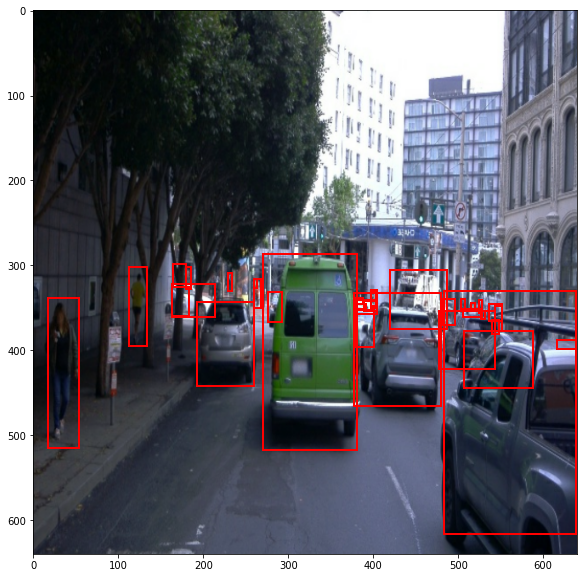

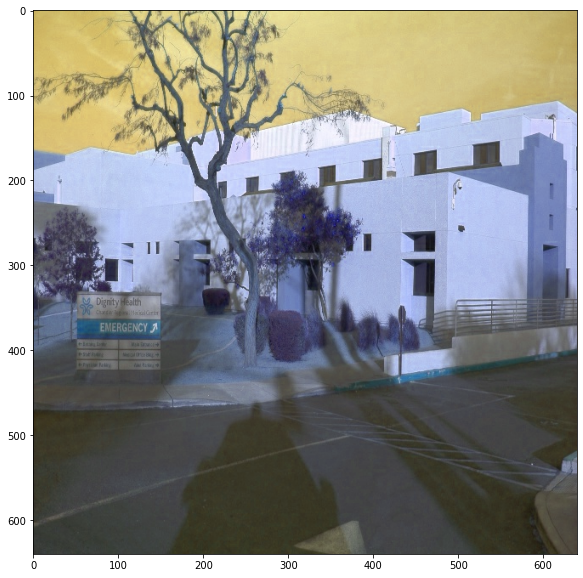

In [51]:
%matplotlib inline

for batch in train_dataset.take(2):
    display_batch(batch)

Folowing data augmentation methods are used:

1) "random_adjust_hue" : This is done so that vehicles are detected not based on their colors anad conversely all cars should be deteced as cars irrespective of its color

2) "adjust_gamma" : Gamma value changes difference between light and dark areas(icreasing gamma would make darker area darker and light areas lighter)

3) "random_jitter_boxes" : this changes box bounds by a value and would help in generalization

Other Modifications of tensorflow obejct detection API explored include:

1) Changing optimizer from moemtum optimizer to RMS optimizer

2) Changing leanring rate schedule from cosine decay to exponential decay

3) increasing batch size is no longer possible with memory usage overhead

4) changing achor_generator values

5) IOU threshold for NMS 

6) using drop out and uagmentations to avoid overfitting